node :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

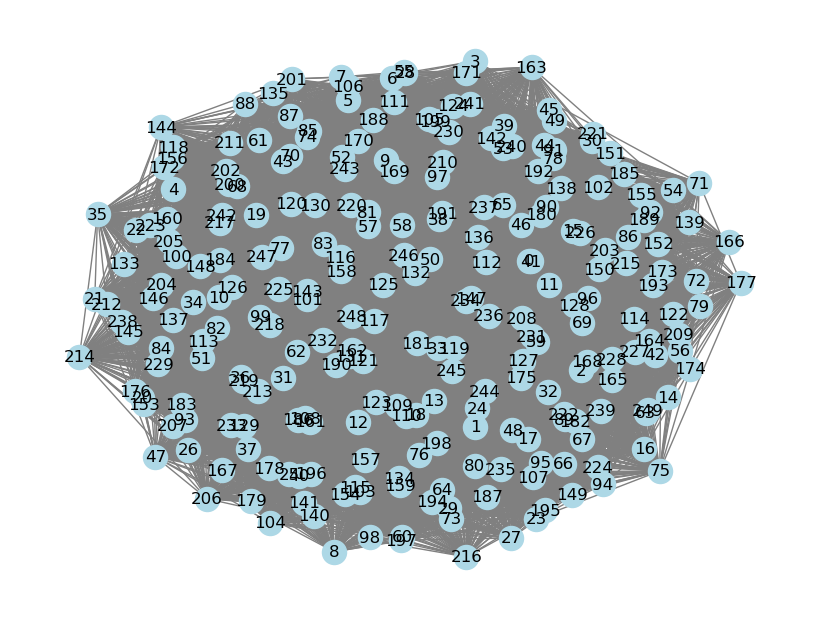

In [5]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

# Küçük graf oluşturma fonksiyonu
def generate_graph(n=250, p=0.4, seed=42):
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, p, seed=seed) #rastgele graf oluştur.
    
    # Graf bağlı mı kontrol et
    if not nx.is_connected(G): #Graf tek parça değilse çalışacak kod.
        components = list(nx.connected_components(G))
        for i in range(len(components)-1): #Parçaları birleştirmek için döngü.
            u = random.choice(list(components[i])) #i'inci component içinden rastgele bir düğüm seçiyor
            v = random.choice(list(components[i+1])) #i+1inci component içinden rastgele bir düğüm seçiyor
            G.add_edge(u, v) # Seçilen u ve v düğümlerini birbirine kenar ekleyerek bağlar.  Böylece graf tek parça (connected) hale gelir
    
    return G
G =generate_graph()
print("node : ",G.nodes())
print("edge:" , G.edges())

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()


In [7]:
def ozellikleri_ata(G):
    for node in G.nodes():
        G.nodes[node]['processing_delay']=round(random.uniform(0.5, 2.0), 2 ) #ms - sonraki 2 sayısı iki ondalik basamağa yuvarla demek
        G.nodes[node]['node_reliability']=round(random.uniform(0.95 ,0.999), 3 )

    for u, v in G.edges():
        G.edges[u, v]['bandwidth']=round(random.uniform(100 , 1000),1)
        G.edges[u, v]['link_delay']=round(random.uniform(3 , 15) , 1)
        G.edges[u, v][ 'link_reliability']=round(random.uniform(0.95 , 0.999),3)

    return G

G=ozellikleri_ata(G)

print("\n Düğümler ve özellikleri:")
for node in G.nodes(data=True): #grafın tüm düğümlerini ve her düğüme atanmış özelliklerini tek tek alır
    print(node)

print("\n Bağlantıalr ve özellikleri:")   
for edge in G.edges(data=True):
    print(edge)


 Düğümler ve özellikleri:
(0, {'processing_delay': 1.46, 'node_reliability': 0.951})
(1, {'processing_delay': 0.91, 'node_reliability': 0.961})
(2, {'processing_delay': 1.6, 'node_reliability': 0.983})
(3, {'processing_delay': 1.84, 'node_reliability': 0.954})
(4, {'processing_delay': 1.13, 'node_reliability': 0.951})
(5, {'processing_delay': 0.83, 'node_reliability': 0.975})
(6, {'processing_delay': 0.54, 'node_reliability': 0.96})
(7, {'processing_delay': 1.47, 'node_reliability': 0.977})
(8, {'processing_delay': 0.83, 'node_reliability': 0.979})
(9, {'processing_delay': 1.71, 'node_reliability': 0.95})
(10, {'processing_delay': 1.71, 'node_reliability': 0.984})
(11, {'processing_delay': 1.01, 'node_reliability': 0.958})
(12, {'processing_delay': 1.94, 'node_reliability': 0.966})
(13, {'processing_delay': 0.64, 'node_reliability': 0.955})
(14, {'processing_delay': 1.77, 'node_reliability': 0.98})
(15, {'processing_delay': 1.71, 'node_reliability': 0.986})
(16, {'processing_delay': 1

In [9]:
def total_delay(path,G):
    delay=0
    for i in range(len(path)-1):
        u=path[i]
        v=path[i+1]

        delay +=G.edges[u,v]['link_delay'] 

    for node in path[1:-1]:
        delay += G.nodes[node]['processing_delay']

    return delay


def reliability_cost(path, G):
    total_cost=0

# Bağlantı güvenilirlik maliyeti
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        r = G.edges[u, v]['link_reliability']
        total_cost += -math.log(r)

    for node in path:
        r=G.nodes[node]['node_reliability']
        total_cost += -math.log(r)
    return total_cost


def resource_cost(path,G):
    total_cost=0 
    for i in range(len(path)-1):
        u = path[i]
        v= path[i+1]
        bw=G.edges[u,v]['bandwidth']
        total_cost += 1000 / bw
    return total_cost


def weighted_sum_method(path,G,w_delay=0.33,w_reliability=0.33, w_source=0.34): #önem sırasına göre oranları değiştirebilriz

    td=total_delay(path,G)
    rc=reliability_cost(path,G)
    rct=resource_cost(path,G)
    total=w_delay * td + w_reliability * rc+ w_source * rct
    return total
    



ornek_path = [0, 2] 
print("Örnek path:", ornek_path)

try:
    print("Toplam gecikme:", total_delay(ornek_path, G))
    print("Güvenilirlik maaliyeti:", reliability_cost(ornek_path, G))
    print("Kaynak maaliyeti:", resource_cost(ornek_path, G))

    total_cost = weighted_sum_method(ornek_path, G,
                                            w_delay=0.33,
                                            w_reliability=0.33,
                                            w_source=0.34)
    

    print("Çok amaçlı toplam maliyet:", total_cost)
except Exception as e:
    print("Bir hata oluştu:", e)

Örnek path: [0, 2]
Toplam gecikme: 3.3
Güvenilirlik maaliyeti: 0.09887804236308816
Kaynak maaliyeti: 1.5151515151515151
Çok amaçlı toplam maliyet: 1.6367812691313341


In [11]:
# Hücre 4: Örnek bir S-D yolu bul ve metrikleri hesapla

# 1) Kaynak (S) ve hedef (D) düğümlerini seçelim
S = 0
D = 5

print("Seçilen kaynak (S):", S)
print("Seçilen hedef (D):", D)

# 2) Graf üzerinde S'den D'ye bir yol bulalım
try:
    # Kenar sayısına göre en kısa yol (saf topolojik)
    ornek_path = nx.shortest_path(G, source=S, target=D)
    print("Bulunan yol (path):", ornek_path)

    # 3) Metrikleri hesaplayalım
    td=total_delay(ornek_path, G)
    rc=reliability_cost(ornek_path, G)
    rct=resource_cost(ornek_path, G)
    wsm = weighted_sum_method(ornek_path, G,
                                   w_delay=0.33,
                                   w_reliability=0.33,
                                   w_source=0.34)

    print("\n--- Metrikler ---")
    print("Toplam gecikme:", td)
    print("Güvenilirlik maliyeti:", rc)
    print("Kaynak maliyeti:", rct)
    print("Çok amaçlı toplam maliyet:", wsm)

except nx.NetworkXNoPath:
    print(f"{S} ile {D} arasında yol yok, başka S ve D seçmeyi dene.")

Seçilen kaynak (S): 0
Seçilen hedef (D): 5
Bulunan yol (path): [0, 2, 5]

--- Metrikler ---
Toplam gecikme: 16.8
Güvenilirlik maliyeti: 0.13424618620087952
Kaynak maliyeti: 6.865606303808551
Çok amaçlı toplam maliyet: 7.922607384741198


In [37]:
import random
import math
import networkx as nx

class GeneticAlgorithm:

    def __init__(self, G, start, end, population_size=40, generations=150,
                 crossover_rate=0.8, mutation_rate=0.2,
                 w_delay=0.33, w_reliability=0.33, w_resource=0.34):

        self.G = G
        self.start = start
        self.end = end
        
        self.population_size = population_size
        self.generations = generations
        
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        
        # fitness ağırlıkları
        self.w_delay = w_delay
        self.w_reliability = w_reliability
        self.w_resource = w_resource

    # -----------------------------
    #  PATH ÜRETİCİ
    # -----------------------------
    def generate_random_path(self):
        """
        Start → End arasında rastgele bir geçerli yol üretir.
        """
        path = [self.start]
        visited = set([self.start])
        
        current = self.start
        
        while current != self.end:
            neighbors = list(self.G.neighbors(current))
            random.shuffle(neighbors)

            moved = False
            for n in neighbors:
                if n not in visited:
                    visited.add(n)
                    path.append(n)
                    current = n
                    moved = True
                    break

            if not moved:
                # çıkmaz yol
                return self.generate_random_path()

        return path

    # -----------------------------
    #  FITNESS HESAPLAMA
    # -----------------------------
    def total_delay(self, path):
        delay = 0
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            delay += self.G.edges[u, v]['link_delay']

        for node in path[1:-1]:
            delay += self.G.nodes[node]['processing_delay']

        return delay

    def reliability_cost(self, path):
        cost = 0
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            cost += -math.log(self.G.edges[u, v]['link_reliability'])

        for node in path:
            cost += -math.log(self.G.nodes[node]['node_reliability'])

        return cost

    def resource_cost(self, path):
        cost = 0
        for i in range(len(path)-1):
            u, v = path[i], path[i+1]
            bw = self.G.edges[u, v]['bandwidth']
            cost += 1000 / bw
        return cost

    def fitness(self, path):
        td = self.total_delay(path)
        rc = self.reliability_cost(path)
        rsc = self.resource_cost(path)

        return (self.w_delay * td +
                self.w_reliability * rc +
                self.w_resource * rsc)

    # -----------------------------
    #  SEÇİM (TOURNAMENT)
    # -----------------------------
    def tournament_selection(self, population):
        c1 = random.choice(population)
        c2 = random.choice(population)
        return c1 if self.fitness(c1) < self.fitness(c2) else c2

    # -----------------------------
    #  CROSSOVER
    # -----------------------------
    def crossover(self, p1, p2):
        common_nodes = list(set(p1) & set(p2))

        if len(common_nodes) <= 2:
            return p1[:], p2[:]  # crossover yapılamaz
        
        pivot = random.choice(common_nodes)

        i1 = p1.index(pivot)
        i2 = p2.index(pivot)

        child1 = p1[:i1] + p2[i2:]
        child2 = p2[:i2] + p1[i1:]

        return self.repair(child1), self.repair(child2)

    # -----------------------------
    #  MUTASYON
    # -----------------------------
    def mutate(self, path):
        
        if len(path) < 3:
            return path
        
        if random.random() > self.mutation_rate:
            return path
        
        idx = random.randint(1, len(path)-2)
        current = path[idx]
        prev = path[idx-1]

        neighbors = list(self.G.neighbors(prev))
        neighbors = [n for n in neighbors if n != current]

        if not neighbors:
            return path
        
        new_node = random.choice(neighbors)

        new_path = path[:idx] + [new_node]
        return self.repair(new_path)

    # -----------------------------
    #  REPAIR (GEÇERSİZ YOLU TAMİR ETME)
    # -----------------------------
    def repair(self, path):
        # son düğümü kontrol et
        current = path[-1]
        if current == self.end:
            return path

        visited = set(path)
        while current != self.end:
            neighbors = list(self.G.neighbors(current))
            random.shuffle(neighbors)

            moved = False
            for n in neighbors:
                if n not in visited:
                    visited.add(n)
                    path.append(n)
                    current = n
                    moved = True
                    break

            if not moved:
                return self.generate_random_path()

        return path

    # -----------------------------
    #  ANA GA DÖNGÜSÜ
    # -----------------------------
    def run(self):
        population = [self.generate_random_path() for _ in range(self.population_size)]

        best_path = None
        best_cost = float('inf')

        for gen in range(self.generations):

            new_population = []

            # Elitizm
            sorted_pop = sorted(population, key=lambda p: self.fitness(p))
            new_population.append(sorted_pop[0])

            while len(new_population) < self.population_size:

                p1 = self.tournament_selection(population)
                p2 = self.tournament_selection(population)

                if random.random() < self.crossover_rate:
                    c1, c2 = self.crossover(p1, p2)
                else:
                    c1, c2 = p1[:], p2[:]

                c1 = self.mutate(c1)
                c2 = self.mutate(c2)

                new_population.extend([c1, c2])

            population = new_population[:self.population_size]

            # En iyiyi güncelle
            for p in population:
                c = self.fitness(p)
                if c < best_cost:
                    best_cost = c
                    best_path = p

            print(f"Generation {gen+1}: Best Cost = {best_cost:.4f}")

        return best_path, best_cost


def compare_paths(G, ga, start, end, best_path):
    print("\n📌 Karşılaştırma Başlıyor...\n")

    # NetworkX shortest path
    try:
        nx_path = nx.shortest_path(G, start, end)
    except nx.NetworkXNoPath:
        print("NetworkX: Bu iki düğüm arasında path yok.")
        return

    print("GA Path: ", best_path)
    print("NX Path: ", nx_path)
    print("-" * 40)

    print("GA Path Delay:", ga.total_delay(best_path))
    print("NX Path Delay:", ga.total_delay(nx_path))

    print("GA Path Reliability:", ga.reliability_cost(best_path))
    print("NX Path Reliability:", ga.reliability_cost(nx_path))

    print("GA Path Resource:", ga.resource_cost(best_path))
    print("NX Path Resource:", ga.resource_cost(nx_path))

    print("-" * 40)
    print("GA Total Cost:", ga.fitness(best_path))
    print("NX Total Cost:", ga.fitness(nx_path))
    print("\n✔ Karşılaştırma tamamlandı.\n")


# ================================================================
#  ARAYÜZCÜ ARKADAŞIN ÇAĞIRACAĞI TEK FONKSİYON
# ================================================================
def run_ga_for_ui(G, start, end,
                  population_size=40,
                  generations=100,
                  crossover_rate=0.8,
                  mutation_rate=0.2,
                  w_delay=0.33,
                  w_reliability=0.33,
                  w_resource=0.34):

    ga = GeneticAlgorithm(
        G,
        start=start,
        end=end,
        population_size=population_size,
        generations=generations,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        w_delay=w_delay,
        w_reliability=w_reliability,
        w_resource=w_resource
    )

    best_path, best_cost = ga.run()

    return {
        "path": best_path,
        "total_cost": best_cost,
        "delay": ga.total_delay(best_path),
        "reliability_cost": ga.reliability_cost(best_path),
        "resource_cost": ga.resource_cost(best_path)
    }


ga = GeneticAlgorithm(G, start=32, end=187, 
                      population_size=40, generations=100)

best_path, best_cost = ga.run()
compare_paths(G, ga, 32, 187, best_path)


Generation 1: Best Cost = 11.4753
Generation 2: Best Cost = 11.4753
Generation 3: Best Cost = 11.4753
Generation 4: Best Cost = 11.4753
Generation 5: Best Cost = 11.4753
Generation 6: Best Cost = 11.4753
Generation 7: Best Cost = 11.4753
Generation 8: Best Cost = 11.4753
Generation 9: Best Cost = 11.4753
Generation 10: Best Cost = 11.4753
Generation 11: Best Cost = 11.4753
Generation 12: Best Cost = 11.4753
Generation 13: Best Cost = 11.4753
Generation 14: Best Cost = 11.4753
Generation 15: Best Cost = 11.4753
Generation 16: Best Cost = 11.4753
Generation 17: Best Cost = 11.4753
Generation 18: Best Cost = 11.4753
Generation 19: Best Cost = 11.4753
Generation 20: Best Cost = 11.4753
Generation 21: Best Cost = 4.4155
Generation 22: Best Cost = 4.4155
Generation 23: Best Cost = 4.4155
Generation 24: Best Cost = 4.4155
Generation 25: Best Cost = 4.4155
Generation 26: Best Cost = 4.4155
Generation 27: Best Cost = 4.4155
Generation 28: Best Cost = 4.4155
Generation 29: Best Cost = 4.4155
Gen